In [2]:
# importing all supporting packages needed for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
# importing the 1994 Census database extracted by Barry Becker
dframe = pd.read_csv('insurance.csv', index_col=False)
dframe.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Spliting the variables into Quantitative and Categorical

In [4]:
# classify columns into categorical and quantitative variables

def var_check(df: pd.DataFrame):
    cols = df.columns
    quant_cols = df._get_numeric_data().columns
    cati_cols = list(set(cols) - set(quant_cols))
    return cati_cols, list(set(quant_cols))

# using tuple to unpack the variables 
cati_cols, quant_cols = var_check(dframe)

In [5]:
# categorical variables in this dataset

cati_df = dframe[cati_cols]
cati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   region  1338 non-null   object
 2   smoker  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In the dataset, we have 4 categorical variables. They are categorical variables because they contain a finite number of categories or distinct groups. As seen above, the dtype is an object and are mutually exclusive.

In [6]:
# quantitative variables in this dataset

quant_df = dframe[quant_cols]
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   charges   1338 non-null   float64
 2   children  1338 non-null   int64  
 3   bmi       1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


The above dataset are quantitative variables because they are numeric variables that have an infinite number of values between any two values. As seen above, the dtype is an integer.

#### Relationships between categorical variables and quantitative variables (C->Q) 

In [7]:
# relationships between sex and charges
sex_charges = dframe['charges'].groupby(dframe['sex'])
sex_charges = sex_charges.describe().rename_axis('Statistics').transpose()
sex_charges

Statistics,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


Text(0.5, 1.0, 'Relationships between sex and charges')

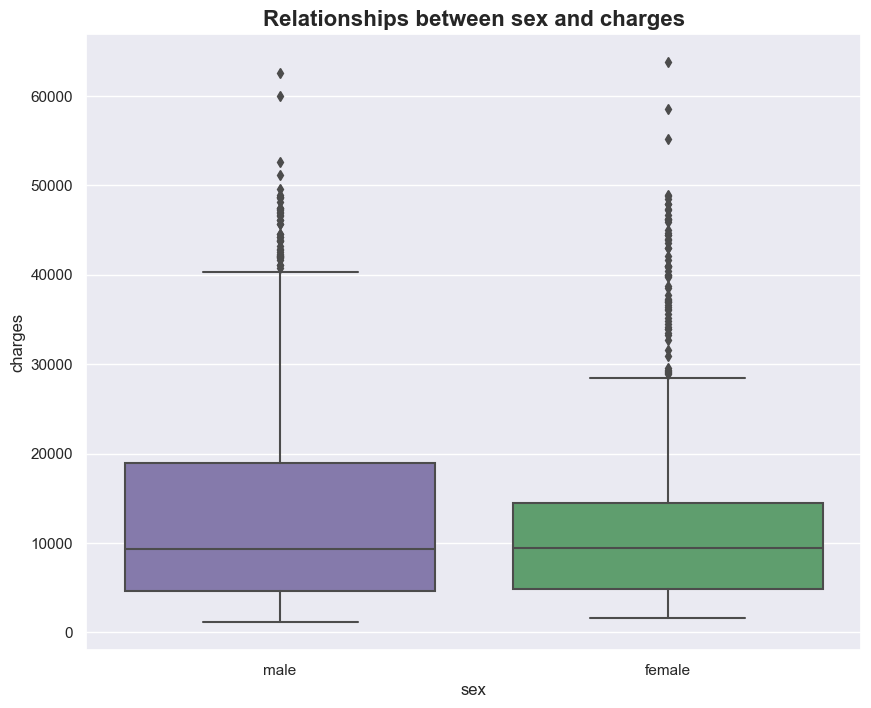

In [8]:
#sns.set_theme(palette='pastel')
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(10, 8)})
C_Q = sns.boxplot(x = 'sex', y = 'charges', data=dframe, order=['male', 'female'], palette=['m', 'g'])
C_Q.set_title('Relationships between sex and charges', fontsize = 16, fontweight = 'bold')

From the statistics, the male customers are charged slightly higher than the female customers with 1,387.18 when comparing the mean values of both sexes. The minimum amount a female is charged is 1,607 while males are charged a minimum of 1,121.  In the boxplot, female have a lot of outliers comparing to the male counterpart. 





#### Relationship between two categorical variables (C->C)

In [9]:
# create cross tabulation of two categorical variables
CCat = pd.crosstab(dframe.sex, dframe.smoker, margins_name='Total', margins=True, rownames=['Sex'], colnames= [''], normalize='index')
CCat = CCat.rename(columns={"no": "non-smoker", "yes": "smoker"}).round(4)
CCat = CCat.drop(index='Total') * 100
CCat

,non-smoker,smoker,Total
Sex,,,
female,547,115,662
male,517,159,676


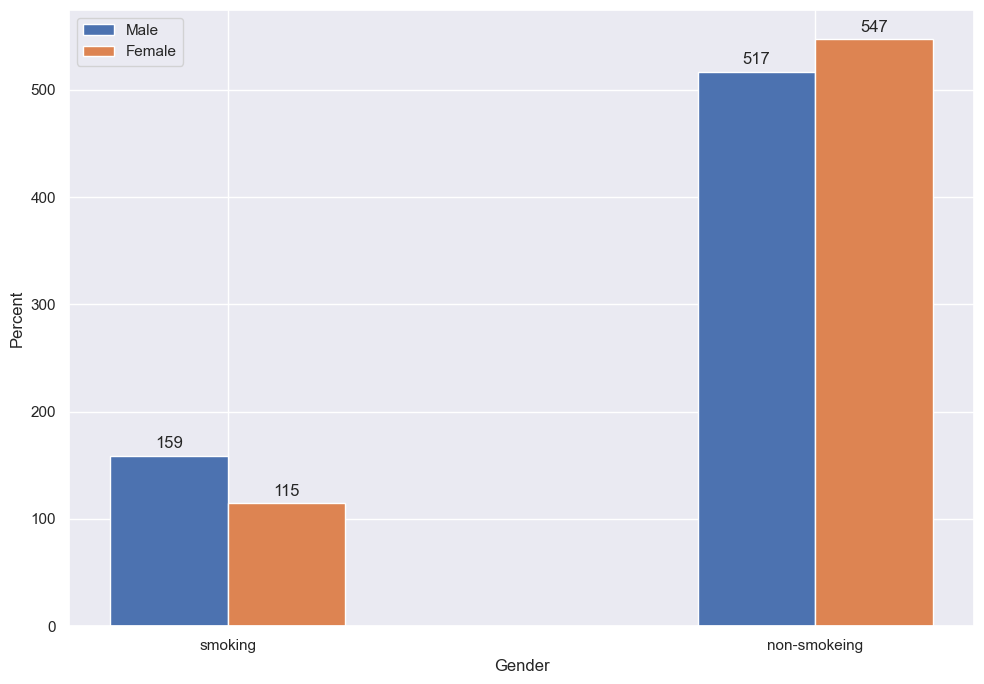

In [10]:
## Bar chart relationship between categorical variables

labels = ['smoking', 'non-smokeing']

# conditional percentages (%)
male_percentage = [CCat.loc['male'][1], CCat.loc['male'][0]]
female_percentage = [CCat.loc['female'][1], CCat.loc['female'][0]]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, male_percentage, width, label='Male')
rects2 = ax.bar(x + width/2, female_percentage, width,label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percent')
ax.set_xlabel('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

From a sample of 1333 individuals with insurance, 274 are smokers while 1,064 are a non-smoker. The bar chart above represents the percentage of male and female smokers and shows that 23.5% of the male customers are smokers while 76.5% are non-smokers.   On the other hand, the female customers who smoke are 17.4% and 82.6% non-smokers.

#### Relationship between two quantitative variables (Q->Q)

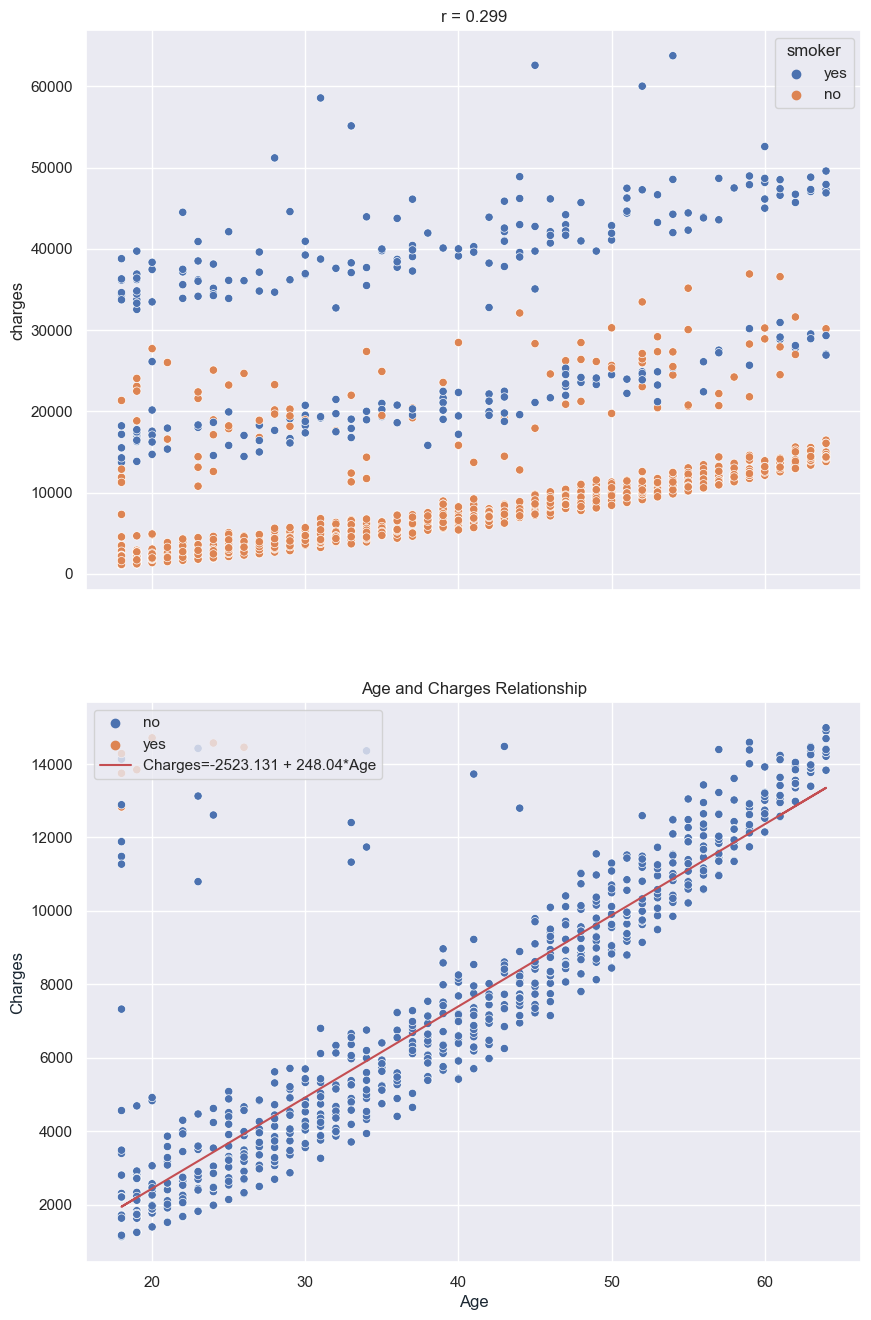

In [13]:
# calculate linear correlation between two quantitative variables
corr_mat = np.corrcoef(dframe['age'], dframe['charges'])
res = corr_mat[0][1]

# scatter plot with least square regression line
# evaluate the linear relationship for insurance charges less than $15k

rdf = dframe[dframe.charges <= 15000]

# correlation

r = np.corrcoef(rdf['age'], rdf['charges'])[0][1]
b = r * (np.std(rdf['charges']) / np.std(rdf['age'])) # calculate slope
a = np.mean(rdf['charges']) - b * np.mean(rdf['age']) # calculate intercept
x = dframe['age'] #np.linspace(10,70) # regression line

y = a + b * x

fig, axes = plt.subplots(2, 1, sharex = True, figsize=(10, 16))

sns.scatterplot(ax = axes[0], data = dframe, x = 'age',  y = 'charges', hue ='smoker', palette="deep")
axes[0].set_title(f'r = {round(res, 4)}')

sns.scatterplot(ax = axes[1], data = rdf, x = 'age', hue = 'smoker', y= 'charges', palette="deep") # plot scatter
axes[1].set_title('Age and Charges Relationship') 
axes[1].plot(x, y, '-r', label=f'Charges={round(a,3)} + {round(b,3)}*Age')
axes[1].legend(loc='upper left')

# plot labels
plt.xlabel('Age', color='#1C2833')
plt.ylabel('Charges', color='#1C2833')
plt.show()

In figure 1, There is a linear relationship between age and charges with a weak positive correlation of 0.299 which is heavily influenced by the outliers. The predicted charges for a customer at age 40 using the least square regression is 7398.468.